<a href="https://colab.research.google.com/github/nisha1365/Sanofi-POC/blob/main/Untitled34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install tweet-preprocessor
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 59.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.9 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039283 sha256=a4eabd223eeb8febe4dbd478c487a3d0406a5d4ae7e7d5b479271a6acb913be7
  Stored in di

In [3]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# import tweet preprocessor
import preprocessor as p

import nltk
import gensim
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from bertopic import BERTopic
#from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
#from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from bertopic.vectorizers import ClassTfidfTransformer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/my_data.csv")
df

Unnamed: 0             tweet_id  external_twitter_id  \
0               0              1030258         1.684840e+18   
1               1              1030186         1.684590e+18   
2               2              1030263         1.684810e+18   
3               3              1030274         1.684720e+18   
4               4              1030288         1.684660e+18   
...           ...                  ...                  ...   
29798       29798  1683839551645814784                  NaN   
29799       29799  1683938283003183104                  NaN   
29800       29800  1683861079674195968                  NaN   
29801       29801  1683918306082955264                  NaN   
29802       29802  1683834001562140672                  NaN   

                                                    text     author_id  \
0      3 peaks Challenge #AxioActive💪\n\nOn the 12th ...  9.050890e+17   
1      Roche Drops Hemophilia A Candidate, Prepares f...  7.638583e+07   
2      Roche moves one Spark hemophilia gene therapy ...  1.481280e+18   
3      On #WorldHepatitisDay we put middle finger up ...  1.145270e+18   
4      One of our newest internship programs, launche...  2.112887e+08   
...                                                  ...           ...   
29798  Hear more from Mosi Williams, Pys.D, on the la...  1.479181e+18   
29799  Was discussing hemophilia with an intelligent,...  2.760856e+08   
29800  The affected &amp; infected have waited decade...  1.104181e+08   
29801  @MohmdBio Sickle cell anemia, Thalassemia, Hem...  1.179873e+18   
29802  Save the date to “tee up for a cure” on Monday...  4.867600e+08   

                created_at lang  referenced_tweets_type  referenced_tweets_id  \
0         28-07-2023 08:18   en                       0          0.000000e+00   
1         27-07-2023 15:51   en                       0          0.000000e+00   
2         28-07-2023 06:34   en                       0          0.000000e+00   
3         28-07-2023 00:27   en                       0          0.000000e+00   
4         27-07-2023 20:13   en                       3          1.684630e+18   
...                    ...  ...                     ...                   ...   
29798  2023-07-25 14:00:07   en                       0          0.000000e+00   
29799  2023-07-25 20:32:27   en                       0          0.000000e+00   
29800  2023-07-25 15:25:40   en                       3          1.683849e+18   
29801  2023-07-25 19:13:04   en                       2          1.683918e+18   
29802  2023-07-25 13:38:04   en                       0          0.000000e+00   

      infos  association_tweet_id  association_scope_id  
0        {}               1030258                    10  
1        {}               1030186                    10  
2        {}               1030263                    10  
3        {}               1030274                    10  
4        {}               1030288                    10  
...     ...                   ...                   ...  
29798    {}   1683839551645814784                    10  
29799    {}   1683938283003183104                    10  
29800    {}   1683861079674195968                    10  
29801    {}   1683918306082955264                    10  
29802    {}   1683834001562140672                    10  

[29803 rows x 12 columns]

In [5]:
columns_to_keep = ['author_id','tweet_id','text','created_at']

new_df = df[columns_to_keep]
new_df

author_id             tweet_id  \
0      9.050890e+17              1030258   
1      7.638583e+07              1030186   
2      1.481280e+18              1030263   
3      1.145270e+18              1030274   
4      2.112887e+08              1030288   
...             ...                  ...   
29798  1.479181e+18  1683839551645814784   
29799  2.760856e+08  1683938283003183104   
29800  1.104181e+08  1683861079674195968   
29801  1.179873e+18  1683918306082955264   
29802  4.867600e+08  1683834001562140672   

                                                    text           created_at  
0      3 peaks Challenge #AxioActive💪\n\nOn the 12th ...     28-07-2023 08:18  
1      Roche Drops Hemophilia A Candidate, Prepares f...     27-07-2023 15:51  
2      Roche moves one Spark hemophilia gene therapy ...     28-07-2023 06:34  
3      On #WorldHepatitisDay we put middle finger up ...     28-07-2023 00:27  
4      One of our newest internship programs, launche...     27-07-2023 20:13  
...                                                  ...                  ...  
29798  Hear more from Mosi Williams, Pys.D, on the la...  2023-07-25 14:00:07  
29799  Was discussing hemophilia with an intelligent,...  2023-07-25 20:32:27  
29800  The affected &amp; infected have waited decade...  2023-07-25 15:25:40  
29801  @MohmdBio Sickle cell anemia, Thalassemia, Hem...  2023-07-25 19:13:04  
29802  Save the date to “tee up for a cure” on Monday...  2023-07-25 13:38:04  

[29803 rows x 4 columns]

In [7]:
import pandas as pd
# Assuming 'created_at' is in string format, convert it to datetime
new_df['created_at_1'] = pd.to_datetime(new_df['created_at'], errors = 'coerce')


# Create a new column for the date, time, and day
new_df['date'] = new_df['created_at_1'].dt.date
new_df['time'] = new_df['created_at_1'].dt.time
new_df['day_of_week'] = new_df['created_at_1'].dt.day_name()
# Display the updated DataFrame
new_df

author_id             tweet_id  \
0      9.050890e+17              1030258   
1      7.638583e+07              1030186   
2      1.481280e+18              1030263   
3      1.145270e+18              1030274   
4      2.112887e+08              1030288   
...             ...                  ...   
29798  1.479181e+18  1683839551645814784   
29799  2.760856e+08  1683938283003183104   
29800  1.104181e+08  1683861079674195968   
29801  1.179873e+18  1683918306082955264   
29802  4.867600e+08  1683834001562140672   

                                                    text           created_at  \
0      3 peaks Challenge #AxioActive💪\n\nOn the 12th ...     28-07-2023 08:18   
1      Roche Drops Hemophilia A Candidate, Prepares f...     27-07-2023 15:51   
2      Roche moves one Spark hemophilia gene therapy ...     28-07-2023 06:34   
3      On #WorldHepatitisDay we put middle finger up ...     28-07-2023 00:27   
4      One of our newest internship programs, launche...     27-07-2023 20:13   
...                                                  ...                  ...   
29798  Hear more from Mosi Williams, Pys.D, on the la...  2023-07-25 14:00:07   
29799  Was discussing hemophilia with an intelligent,...  2023-07-25 20:32:27   
29800  The affected &amp; infected have waited decade...  2023-07-25 15:25:40   
29801  @MohmdBio Sickle cell anemia, Thalassemia, Hem...  2023-07-25 19:13:04   
29802  Save the date to “tee up for a cure” on Monday...  2023-07-25 13:38:04   

             created_at_1        date      time day_of_week  
0     2023-07-28 08:18:00  2023-07-28  08:18:00      Friday  
1     2023-07-27 15:51:00  2023-07-27  15:51:00    Thursday  
2     2023-07-28 06:34:00  2023-07-28  06:34:00      Friday  
3     2023-07-28 00:27:00  2023-07-28  00:27:00      Friday  
4     2023-07-27 20:13:00  2023-07-27  20:13:00    Thursday  
...                   ...         ...       ...         ...  
29798 2023-07-25 14:00:07  2023-07-25  14:00:07     Tuesday  
29799 2023-07-25 20:32:27  2023-07-25  20:32:27     Tuesday  
29800 2023-07-25 15:25:40  2023-07-25  15:25:40     Tuesday  
29801 2023-07-25 19:13:04  2023-07-25  19:13:04     Tuesday  
29802 2023-07-25 13:38:04  2023-07-25  13:38:04     Tuesday  

[29803 rows x 8 columns]

In [8]:
data_tweet = new_df.loc[:, ['author_id', 'tweet_id','text', 'created_at','created_at_1']]
data_tweet

author_id             tweet_id  \
0      9.050890e+17              1030258   
1      7.638583e+07              1030186   
2      1.481280e+18              1030263   
3      1.145270e+18              1030274   
4      2.112887e+08              1030288   
...             ...                  ...   
29798  1.479181e+18  1683839551645814784   
29799  2.760856e+08  1683938283003183104   
29800  1.104181e+08  1683861079674195968   
29801  1.179873e+18  1683918306082955264   
29802  4.867600e+08  1683834001562140672   

                                                    text           created_at  \
0      3 peaks Challenge #AxioActive💪\n\nOn the 12th ...     28-07-2023 08:18   
1      Roche Drops Hemophilia A Candidate, Prepares f...     27-07-2023 15:51   
2      Roche moves one Spark hemophilia gene therapy ...     28-07-2023 06:34   
3      On #WorldHepatitisDay we put middle finger up ...     28-07-2023 00:27   
4      One of our newest internship programs, launche...     27-07-2023 20:13   
...                                                  ...                  ...   
29798  Hear more from Mosi Williams, Pys.D, on the la...  2023-07-25 14:00:07   
29799  Was discussing hemophilia with an intelligent,...  2023-07-25 20:32:27   
29800  The affected &amp; infected have waited decade...  2023-07-25 15:25:40   
29801  @MohmdBio Sickle cell anemia, Thalassemia, Hem...  2023-07-25 19:13:04   
29802  Save the date to “tee up for a cure” on Monday...  2023-07-25 13:38:04   

             created_at_1  
0     2023-07-28 08:18:00  
1     2023-07-27 15:51:00  
2     2023-07-28 06:34:00  
3     2023-07-28 00:27:00  
4     2023-07-27 20:13:00  
...                   ...  
29798 2023-07-25 14:00:07  
29799 2023-07-25 20:32:27  
29800 2023-07-25 15:25:40  
29801 2023-07-25 19:13:04  
29802 2023-07-25 13:38:04  

[29803 rows x 5 columns]

In [9]:
data_tweet.isnull().sum()

author_id       0
tweet_id        0
text            0
created_at      0
created_at_1    0
dtype: int64

In [10]:
# Customizing the preprocessor to exclude removing hashtags since they are valuable as a rich information
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.MENTION,p.OPT.SMILEY,p.OPT.NUMBER )

#forming a separate feature for cleaned tweets
for i,v in enumerate(data_tweet['text']):
    data_tweet.loc[i,'new_text'] = p.clean(v)

data_tweet.head()

author_id  tweet_id                                               text  \
0  9.050890e+17   1030258  3 peaks Challenge #AxioActive💪\n\nOn the 12th ...   
1  7.638583e+07   1030186  Roche Drops Hemophilia A Candidate, Prepares f...   
2  1.481280e+18   1030263  Roche moves one Spark hemophilia gene therapy ...   
3  1.145270e+18   1030274  On #WorldHepatitisDay we put middle finger up ...   
4  2.112887e+08   1030288  One of our newest internship programs, launche...   

         created_at        created_at_1  \
0  28-07-2023 08:18 2023-07-28 08:18:00   
1  27-07-2023 15:51 2023-07-27 15:51:00   
2  28-07-2023 06:34 2023-07-28 06:34:00   
3  28-07-2023 00:27 2023-07-28 00:27:00   
4  27-07-2023 20:13 2023-07-27 20:13:00   

                                            new_text  
0  peaks Challenge #AxioActive On the th of Augus...  
1  Roche Drops Hemophilia A Candidate, Prepares f...  
2  Roche moves one Spark hemophilia gene therapy ...  
3  On #WorldHepatitisDay we put middle finger up ...  
4  One of our newest internship programs, launche...

In [11]:
#REMOVE ONLY THE '#'NOT THE WORD AFTER
def remove_hashtag_sign(text):
    text = re.sub(r'#', '', text)
    return text

data_tweet['new_text'] = data_tweet['new_text'].apply(lambda x:remove_hashtag_sign(x))

In [12]:
#Remove extra white spaces, punctuation and apply lower casing
data_tweet['new_text'] = data_tweet['new_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
data_tweet.head()

author_id  tweet_id                                               text  \
0  9.050890e+17   1030258  3 peaks Challenge #AxioActive💪\n\nOn the 12th ...   
1  7.638583e+07   1030186  Roche Drops Hemophilia A Candidate, Prepares f...   
2  1.481280e+18   1030263  Roche moves one Spark hemophilia gene therapy ...   
3  1.145270e+18   1030274  On #WorldHepatitisDay we put middle finger up ...   
4  2.112887e+08   1030288  One of our newest internship programs, launche...   

         created_at        created_at_1  \
0  28-07-2023 08:18 2023-07-28 08:18:00   
1  27-07-2023 15:51 2023-07-27 15:51:00   
2  28-07-2023 06:34 2023-07-28 06:34:00   
3  28-07-2023 00:27 2023-07-28 00:27:00   
4  27-07-2023 20:13 2023-07-27 20:13:00   

                                            new_text  
0  peaks challenge axioactive on the th of august...  
1  roche drops hemophilia a candidate prepares fo...  
2  roche moves one spark hemophilia gene therapy ...  
3  on worldhepatitisday we put middle finger up t...  
4  one of our newest internship programs launched...

In [13]:
data_tweet.shape

(29803, 6)

In [14]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatize_text(text):
  """Lemmatizes a text.

  Args:
    text: The text to lemmatize.

  Returns:
    The lemmatized text.
  """

  words = nltk.word_tokenize(text)
  lemmas = [nltk.WordNetLemmatizer().lemmatize(word) for word in words]
  return " ".join(lemmas)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [15]:
data_tweet['new_lemma_text'] = data_tweet["new_text"].apply(lemmatize_text)

In [16]:
data_tweet

author_id             tweet_id  \
0      9.050890e+17              1030258   
1      7.638583e+07              1030186   
2      1.481280e+18              1030263   
3      1.145270e+18              1030274   
4      2.112887e+08              1030288   
...             ...                  ...   
29798  1.479181e+18  1683839551645814784   
29799  2.760856e+08  1683938283003183104   
29800  1.104181e+08  1683861079674195968   
29801  1.179873e+18  1683918306082955264   
29802  4.867600e+08  1683834001562140672   

                                                    text           created_at  \
0      3 peaks Challenge #AxioActive💪\n\nOn the 12th ...     28-07-2023 08:18   
1      Roche Drops Hemophilia A Candidate, Prepares f...     27-07-2023 15:51   
2      Roche moves one Spark hemophilia gene therapy ...     28-07-2023 06:34   
3      On #WorldHepatitisDay we put middle finger up ...     28-07-2023 00:27   
4      One of our newest internship programs, launche...     27-07-2023 20:13   
...                                                  ...                  ...   
29798  Hear more from Mosi Williams, Pys.D, on the la...  2023-07-25 14:00:07   
29799  Was discussing hemophilia with an intelligent,...  2023-07-25 20:32:27   
29800  The affected &amp; infected have waited decade...  2023-07-25 15:25:40   
29801  @MohmdBio Sickle cell anemia, Thalassemia, Hem...  2023-07-25 19:13:04   
29802  Save the date to “tee up for a cure” on Monday...  2023-07-25 13:38:04   

             created_at_1                                           new_text  \
0     2023-07-28 08:18:00  peaks challenge axioactive on the th of august...   
1     2023-07-27 15:51:00  roche drops hemophilia a candidate prepares fo...   
2     2023-07-28 06:34:00  roche moves one spark hemophilia gene therapy ...   
3     2023-07-28 00:27:00  on worldhepatitisday we put middle finger up t...   
4     2023-07-27 20:13:00  one of our newest internship programs launched...   
...                   ...                                                ...   
29798 2023-07-25 14:00:07  hear more from mosi williams pys d on the late...   
29799 2023-07-25 20:32:27  was discussing hemophilia with an intelligent ...   
29800 2023-07-25 15:25:40  the affected amp infected have waited decades ...   
29801 2023-07-25 19:13:04          sickle cell anemia thalassemia hemophilia   
29802 2023-07-25 13:38:04  save the date to tee up for a cure on monday n...   

                                          new_lemma_text  
0      peak challenge axioactive on the th of august ...  
1      roche drop hemophilia a candidate prepares for...  
2      roche move one spark hemophilia gene therapy i...  
3      on worldhepatitisday we put middle finger up t...  
4      one of our newest internship program launched ...  
...                                                  ...  
29798  hear more from mosi williams pys d on the late...  
29799  wa discussing hemophilia with an intelligent e...  
29800  the affected amp infected have waited decade f...  
29801          sickle cell anemia thalassemia hemophilia  
29802  save the date to tee up for a cure on monday n...  

[29803 rows x 7 columns]

In [17]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.9/457.9 kB 9.2 MB/s eta 0:00:00


In [18]:
#Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [19]:
# Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine',random_state=100)

In [20]:
#Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15,min_samples = 5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [21]:
# #Tokenize topics
# nltk.download('stopwords')
# stopwords = stopwords.words('english')
# vectorizer_model = CountVectorizer(stop_words= stopwords)

vectorizer_model = CountVectorizer(stop_words="english")

In [22]:
#Create topic representation
ctfidf_model = ClassTfidfTransformer()

In [23]:
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance

representation_model = MaximalMarginalRelevance(diversity=0.3)

topic_model = BERTopic(
  embedding_model=embedding_model,    # Step 1 - Extract embeddings
  umap_model=umap_model,              # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  representation_model=representation_model,
  nr_topics='auto',
  low_memory=True,
  n_gram_range=(1, 3),
  calculate_probabilities=True,
  verbose=True,
)

In [24]:
import time

In [25]:
tweet_list = data_tweet.new_lemma_text.tolist()
timestamp=data_tweet.created_at.tolist()
timestamps=data_tweet.created_at_1.tolist()

In [26]:
topics, probs = topic_model.fit_transform(tweet_list)

2024-01-29 07:39:43,083 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/932 [00:00<?, ?it/s]

2024-01-29 07:49:55,359 - BERTopic - Embedding - Completed ✓
2024-01-29 07:49:55,361 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-29 07:51:11,965 - BERTopic - Dimensionality - Completed ✓
2024-01-29 07:51:11,968 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-29 08:12:55,507 - BERTopic - Cluster - Completed ✓
2024-01-29 08:12:55,510 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-29 08:15:22,871 - BERTopic - Representation - Completed ✓
2024-01-29 08:15:22,874 - BERTopic - Topic reduction - Reducing number of topics
2024-01-29 08:15:57,032 - BERTopic - Topic reduction - Reduced number of topics from 758 to 173


In [31]:
topic_model.get_topic_info()

Topic  Count                                               Name  \
0       -1   4661                -1_hemophilia_haemophilia_blood_day   
1        0  19279            0_hemophilia_haemophilia_bleeding_blood   
2        1    224  1_adress_bc1qckq4ta5t87qzjm7ykp5lrphjkrfyjrdwy...   
3        2    176                  2_2023_letter_infection_hepatitis   
4        3    163             3_injection_needly_laghari_financially   
..     ...    ...                                                ...   
168    167     15                    167_escape_crisis_interview_vwd   
169    168     15                168_webinar_debra_wednesday_feature   
170    169     15                   169_young_acted_retire_bedridden   
171    170     15                       170_4218_591_rrectorweb_code   
172    171     15     171_scandal_mankyblood_accountabilty_wallowing   

                                        Representation  \
0    [hemophilia, haemophilia, blood, day, disease,...   
1    [hemophilia, haemophilia, bleeding, blood, tre...   
2    [adress, bc1qckq4ta5t87qzjm7ykp5lrphjkrfyjrdwy...   
3    [2023, letter, infection, hepatitis, victim, o...   
4    [injection, needly, laghari, financially, yous...   
..                                                 ...   
168  [escape, crisis, interview, vwd, clinical, ble...   
169  [webinar, debra, wednesday, feature, smart, co...   
170  [young, acted, retire, bedridden, ron, 70, fau...   
171  [4218, 591, rrectorweb, code, oncology, hemato...   
172  [scandal, mankyblood, accountabilty, wallowing...   

                                   Representative_Docs  
0    [today is world hemophilia day a day to raise ...  
1    [today is worldhaemophiliaday a day when we co...  
2    [guy help me a much a you can i have hemophili...  
3    [an open letter to who from victim of hemophil...  
4    [my name is yousif laghari hemophilia patient ...  
..                                                 ...  
168  [why do woman with vwd escape clinical detecti...  
169  [join u for the first in a part series with de...  
170  [he should have all those virus he s manipulat...  
171  [florida academic division chief hemophilia he...  
172  [time journalist got their head around this st...  

[173 rows x 5 columns]

In [33]:
topic_info = topic_model.get_topic_info()
topic_info


Topic  Count                                               Name  \
0       -1   4661                -1_hemophilia_haemophilia_blood_day   
1        0  19279            0_hemophilia_haemophilia_bleeding_blood   
2        1    224  1_adress_bc1qckq4ta5t87qzjm7ykp5lrphjkrfyjrdwy...   
3        2    176                  2_2023_letter_infection_hepatitis   
4        3    163             3_injection_needly_laghari_financially   
..     ...    ...                                                ...   
168    167     15                    167_escape_crisis_interview_vwd   
169    168     15                168_webinar_debra_wednesday_feature   
170    169     15                   169_young_acted_retire_bedridden   
171    170     15                       170_4218_591_rrectorweb_code   
172    171     15     171_scandal_mankyblood_accountabilty_wallowing   

                                        Representation  \
0    [hemophilia, haemophilia, blood, day, disease,...   
1    [hemophilia, haemophilia, bleeding, blood, tre...   
2    [adress, bc1qckq4ta5t87qzjm7ykp5lrphjkrfyjrdwy...   
3    [2023, letter, infection, hepatitis, victim, o...   
4    [injection, needly, laghari, financially, yous...   
..                                                 ...   
168  [escape, crisis, interview, vwd, clinical, ble...   
169  [webinar, debra, wednesday, feature, smart, co...   
170  [young, acted, retire, bedridden, ron, 70, fau...   
171  [4218, 591, rrectorweb, code, oncology, hemato...   
172  [scandal, mankyblood, accountabilty, wallowing...   

                                   Representative_Docs  
0    [today is world hemophilia day a day to raise ...  
1    [today is worldhaemophiliaday a day when we co...  
2    [guy help me a much a you can i have hemophili...  
3    [an open letter to who from victim of hemophil...  
4    [my name is yousif laghari hemophilia patient ...  
..                                                 ...  
168  [why do woman with vwd escape clinical detecti...  
169  [join u for the first in a part series with de...  
170  [he should have all those virus he s manipulat...  
171  [florida academic division chief hemophilia he...  
172  [time journalist got their head around this st...  

[173 rows x 5 columns]

In [34]:
topic_info_filtered = topic_info.iloc[1:] # Exclude the first row
topic_info_filtered

Topic  Count                                               Name  \
1        0  19279            0_hemophilia_haemophilia_bleeding_blood   
2        1    224  1_adress_bc1qckq4ta5t87qzjm7ykp5lrphjkrfyjrdwy...   
3        2    176                  2_2023_letter_infection_hepatitis   
4        3    163             3_injection_needly_laghari_financially   
5        4    141                   4_curable_pcos_meditation_siddha   
..     ...    ...                                                ...   
168    167     15                    167_escape_crisis_interview_vwd   
169    168     15                168_webinar_debra_wednesday_feature   
170    169     15                   169_young_acted_retire_bedridden   
171    170     15                       170_4218_591_rrectorweb_code   
172    171     15     171_scandal_mankyblood_accountabilty_wallowing   

                                        Representation  \
1    [hemophilia, haemophilia, bleeding, blood, tre...   
2    [adress, bc1qckq4ta5t87qzjm7ykp5lrphjkrfyjrdwy...   
3    [2023, letter, infection, hepatitis, victim, o...   
4    [injection, needly, laghari, financially, yous...   
5    [curable, pcos, meditation, siddha, yoga, guru...   
..                                                 ...   
168  [escape, crisis, interview, vwd, clinical, ble...   
169  [webinar, debra, wednesday, feature, smart, co...   
170  [young, acted, retire, bedridden, ron, 70, fau...   
171  [4218, 591, rrectorweb, code, oncology, hemato...   
172  [scandal, mankyblood, accountabilty, wallowing...   

                                   Representative_Docs  
1    [today is worldhaemophiliaday a day when we co...  
2    [guy help me a much a you can i have hemophili...  
3    [an open letter to who from victim of hemophil...  
4    [my name is yousif laghari hemophilia patient ...  
5    [join gurudev siyag s siddha yoga meditation m...  
..                                                 ...  
168  [why do woman with vwd escape clinical detecti...  
169  [join u for the first in a part series with de...  
170  [he should have all those virus he s manipulat...  
171  [florida academic division chief hemophilia he...  
172  [time journalist got their head around this st...  

[172 rows x 5 columns]

In [36]:
filtered_topic_info = topic_info_filtered
specific_topic_info = topic_model.get_topic(filtered_topic_info.iloc[0]['Topic'])

specific_topic_info

[('hemophilia', 0.005999077091419248),
 ('haemophilia', 0.005889825638518372),
 ('bleeding', 0.005302733456400813),
 ('blood', 0.005047258237375658),
 ('treatment', 0.004748075706218833),
 ('worldhemophiliaday', 0.004226812395057693),
 ('rare', 0.0037807634821193964),
 ('disease', 0.003562083394117145),
 ('factor', 0.0034287862635745524),
 ('bleedingdisorders', 0.003378908210581837)]

In [37]:
def get_bert_topics(topic_info, topic_model, num_topics):
    word_dict = {}

    for i in range(num_topics):
        topic_id = topic_info.iloc[i]['Topic']
        words = topic_model.get_topic(topic_id)
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]

    return pd.DataFrame(word_dict)

# Assuming topic_model and filtered_topic_info are already defined
num_topics = len(filtered_topic_info)
result_df = get_bert_topics(filtered_topic_info, topic_model, num_topics)

# Display the resulting DataFrame
print(result_df)


           Topic # 01                                  Topic # 02 Topic # 03  \
0          hemophilia                                      adress       2023   
1         haemophilia  bc1qckq4ta5t87qzjm7ykp5lrphjkrfyjrdwyspzcy     letter   
2            bleeding                                         bts  infection   
3               blood                                   apartment  hepatitis   
4           treatment                                    medicine     victim   
5  worldhemophiliaday                                        cure       open   
6                rare                                  hemophilia        aid   
7             disease                                    cannabis    china17   
8              factor                                     venmome    china20   
9   bleedingdisorders                                     breeder    china19   

    Topic # 04      Topic # 05                                  Topic # 06  \
0    injection         curable  0x6193bb9

In [38]:
result_df

Topic # 01                                  Topic # 02 Topic # 03  \
0          hemophilia                                      adress       2023   
1         haemophilia  bc1qckq4ta5t87qzjm7ykp5lrphjkrfyjrdwyspzcy     letter   
2            bleeding                                         bts  infection   
3               blood                                   apartment  hepatitis   
4           treatment                                    medicine     victim   
5  worldhemophiliaday                                        cure       open   
6                rare                                  hemophilia        aid   
7             disease                                    cannabis    china17   
8              factor                                     venmome    china20   
9   bleedingdisorders                                     breeder    china19   

    Topic # 04      Topic # 05                                  Topic # 06  \
0    injection         curable  0x6193bb90bd4b6be8c0bbb498cd996ddbc44ffa99   
1       needly            pcos                                   apartment   
2      laghari      meditation                                     housing   
3  financially          siddha                                       joint   
4       yousif            yoga                                        cure   
5      provide         gurudev                                  hemophilia   
6      support          autism                                        acre   
7      patient  gssymeditation                                     bedroom   
8         help          cancer                                     bugatti   
9   hemophilia    mentalhealth                                      square   

    Topic # 07    Topic # 08   Topic # 09     Topic # 10  ...  \
0        bleed       vaccine        grief          fviii  ...   
1   amputation   vaccination    incurable       antibody  ...   
2        grief          mrna   amputation       sabatino  ...   
3    incurable      bnt162b2  haemophilia            peg  ...   
4        david       covid19     abortion      inhibitor  ...   
5       edward     influenza       grieve         wfhccs  ...   
6   hemophilia   coronavirus     devotion            spk  ...   
7        leila  immunization     bereaved         valrox  ...   
8        slade         lupus     elephant       clinical  ...   
9  haemophilia      sarscov2       regret  transplanting  ...   

         Topic # 163      Topic # 164 Topic # 165          Topic # 166  \
0                hfa   corticosteroid      bloody            savealife   
1          impacting          adrenal    nebraska  togetherwecanwewill   
2            mission    insufficiency     madison           speaktrust   
3            joining          gurnell        lake           socialwork   
4              board          steroid         mix                  sma   
5       organization  endocrinologist     contest               donate   
6          insurance        oestrogen         icc            savelives   
7          community       withdrawal      maryed                 fund   
8           canberra               mg   celebrity             donation   
9  bleedingdisorders          hormone  showcasing                 bank   

  Topic # 167             Topic # 168 Topic # 169  Topic # 170  Topic # 171  \
0     renewal                  escape     webinar        young         4218   
1    medicaid                  crisis       debra        acted          591   
2       state               interview   wednesday       retire   rrectorweb   
3    consumer                     vwd     feature    bedridden         code   
4     address                clinical       smart          ron     oncology   
5       pause       bleedingdisorders   coalition           70   hematology   
6     covid19  internationalwomensday     founder        fauci      faculty   
7        toll            gynecologist   financial      russell         cell   
8       alert                

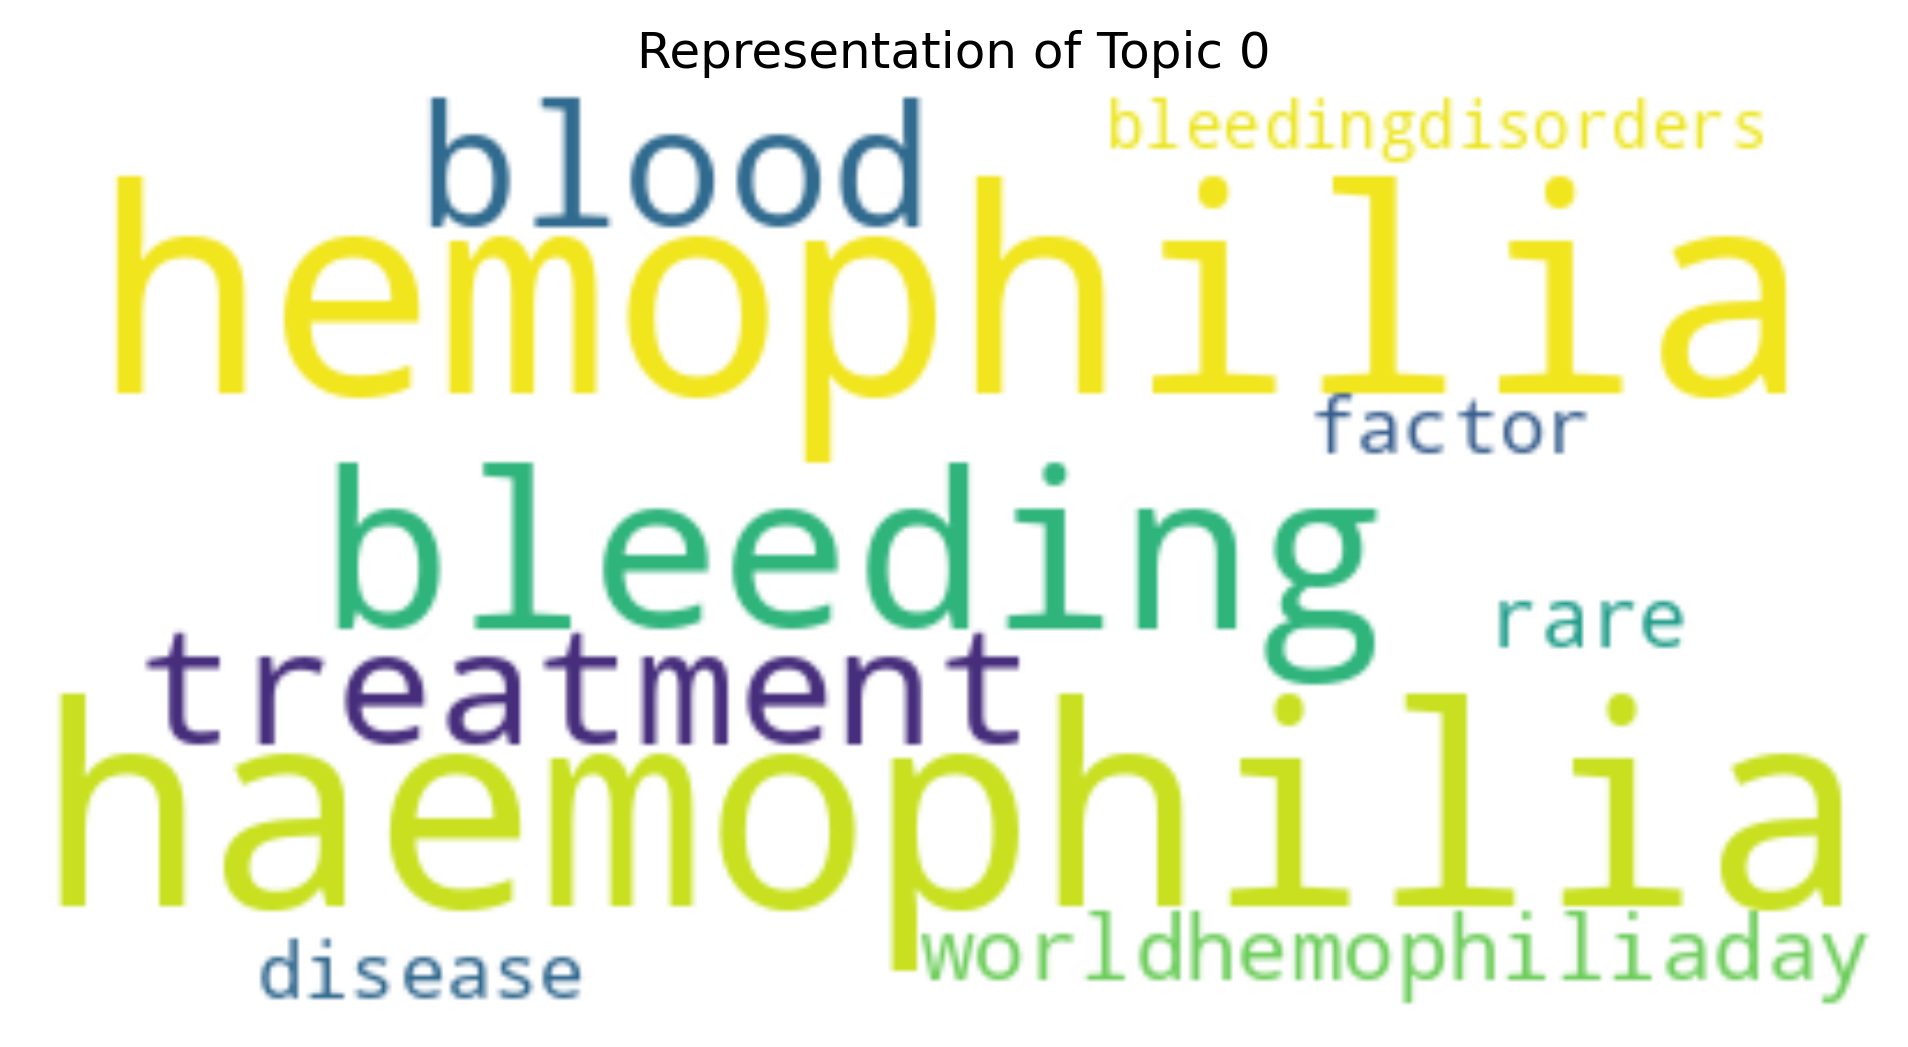

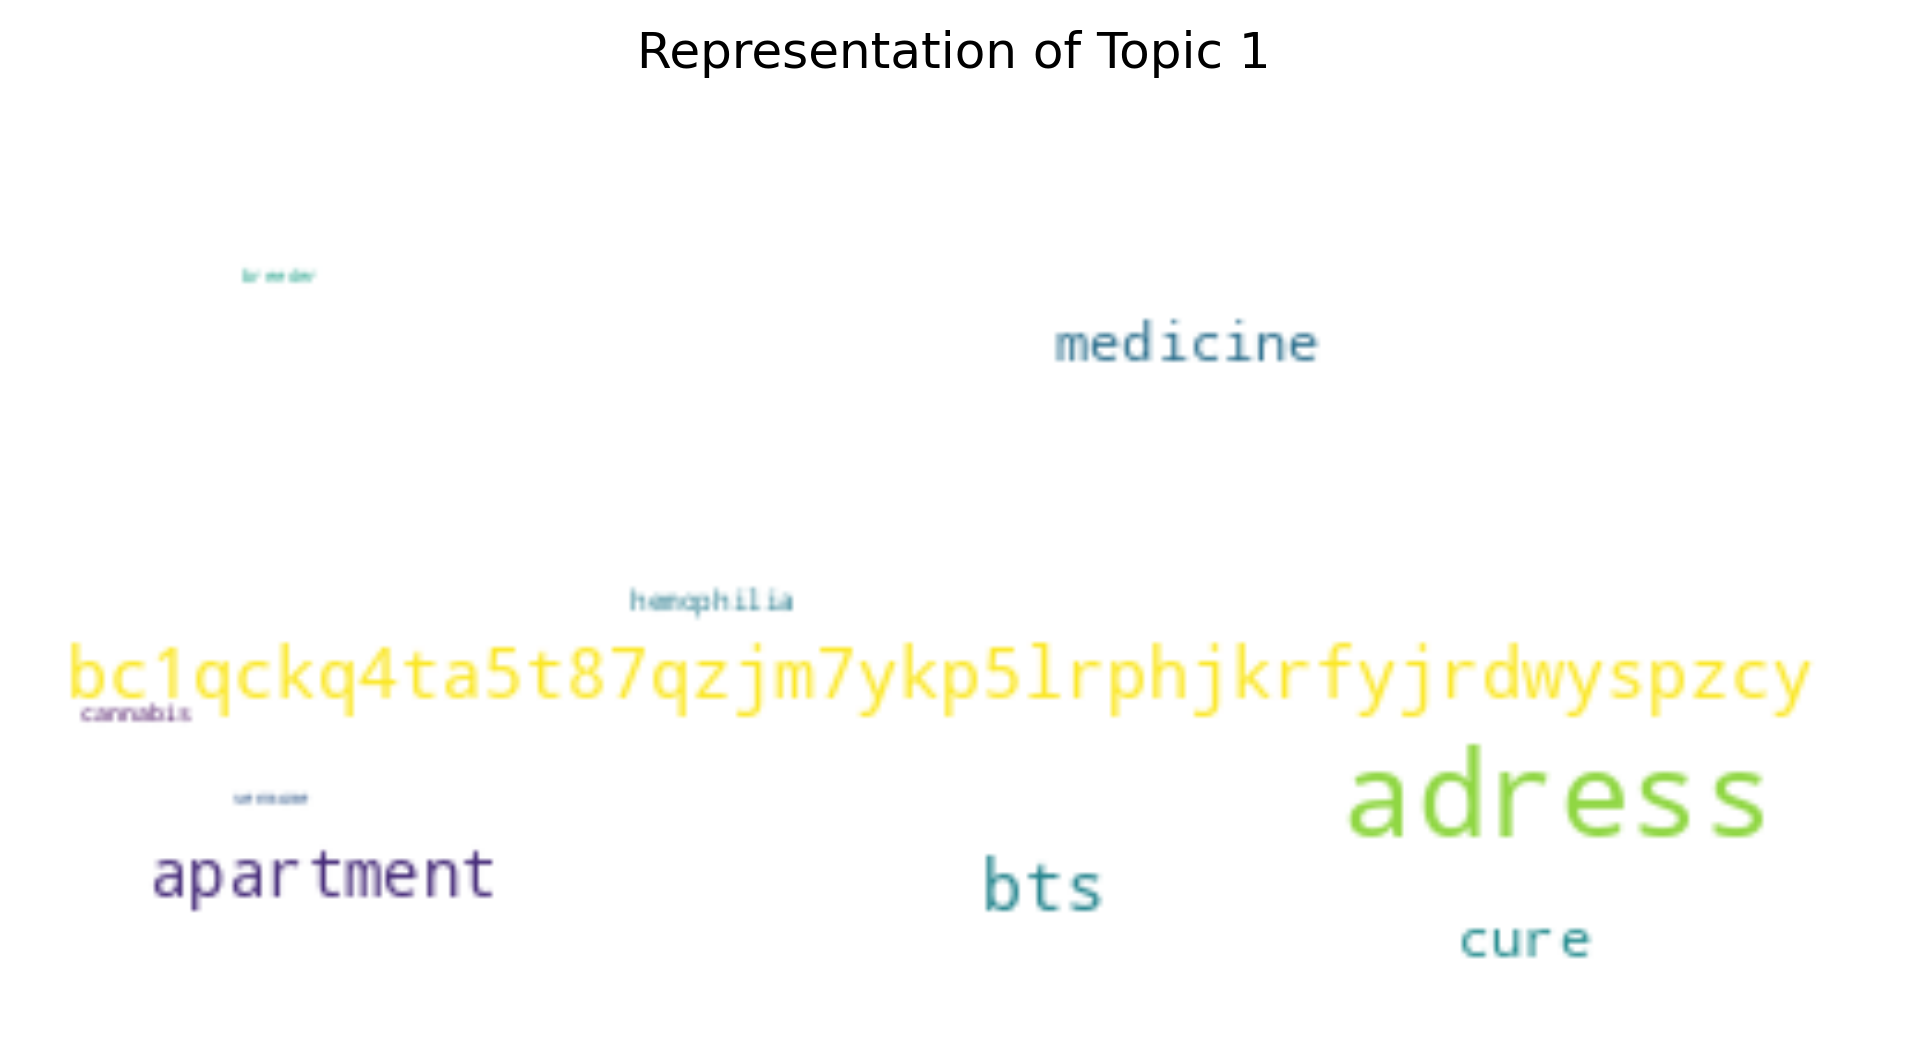

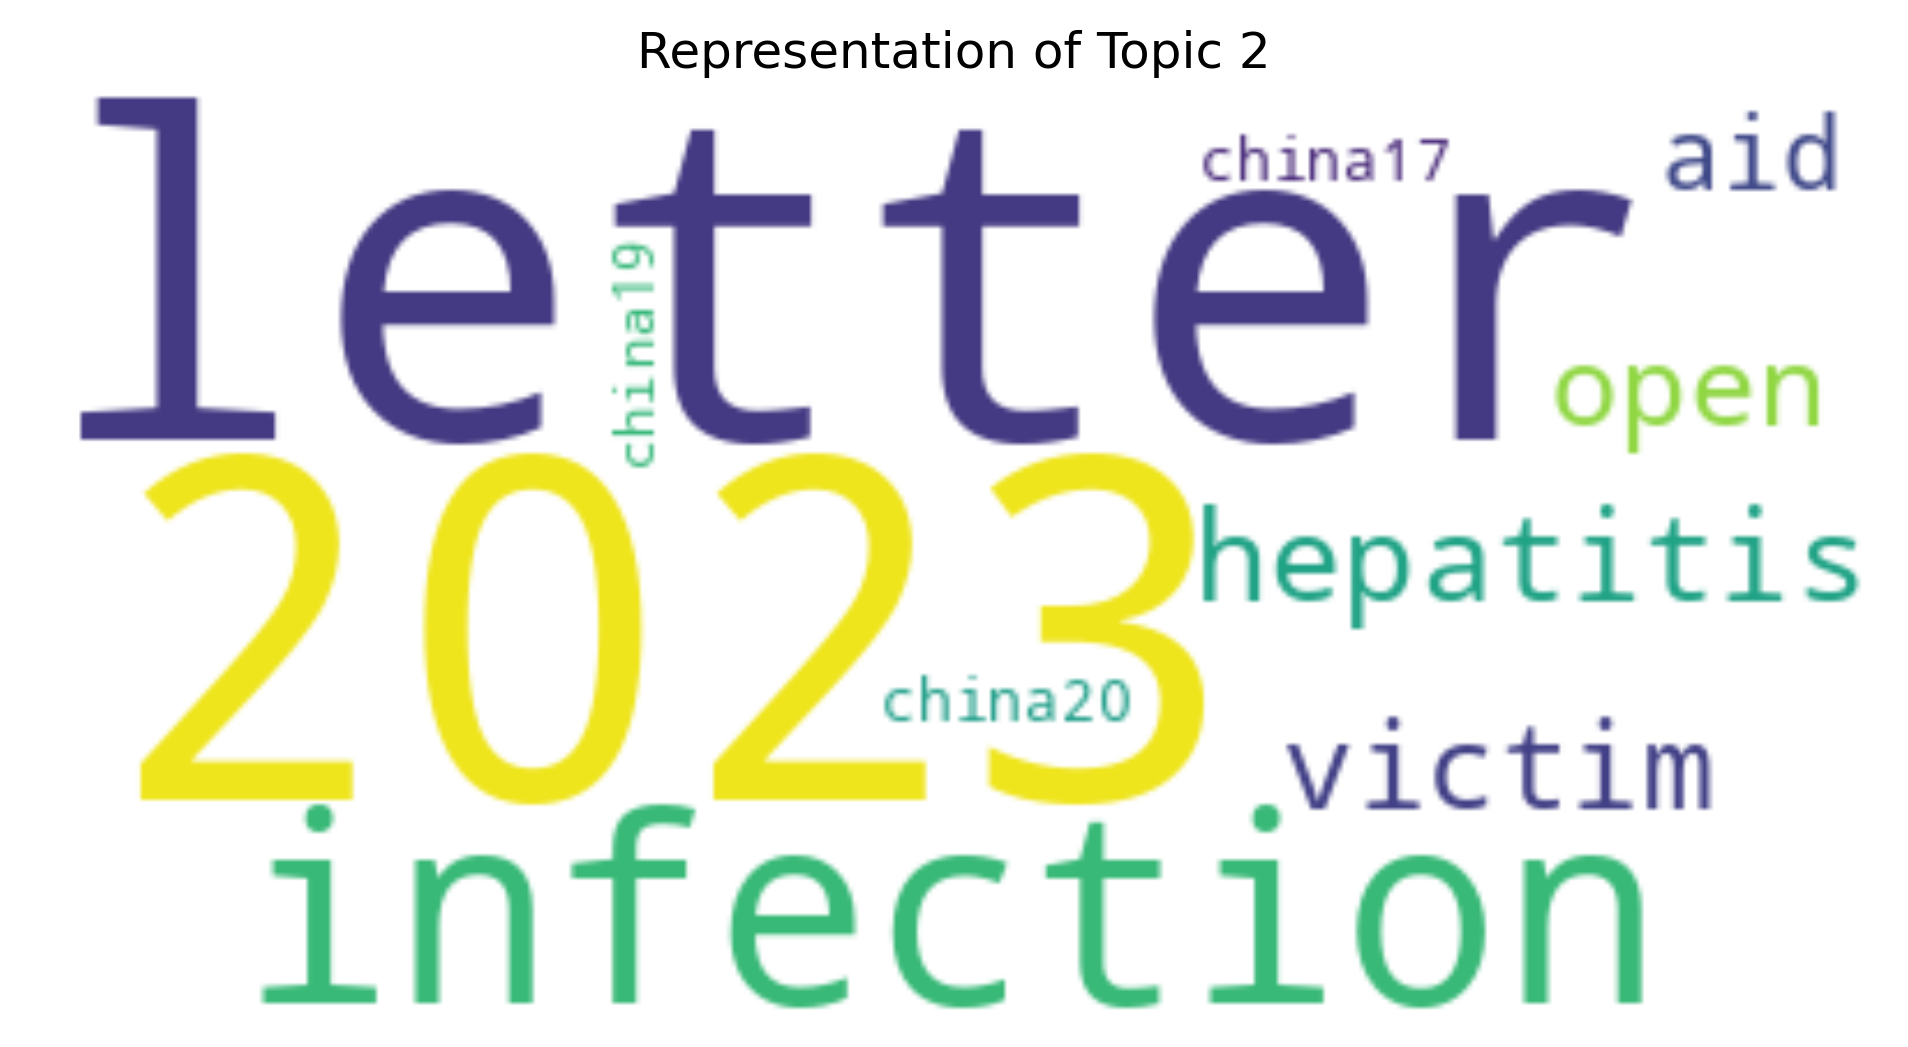

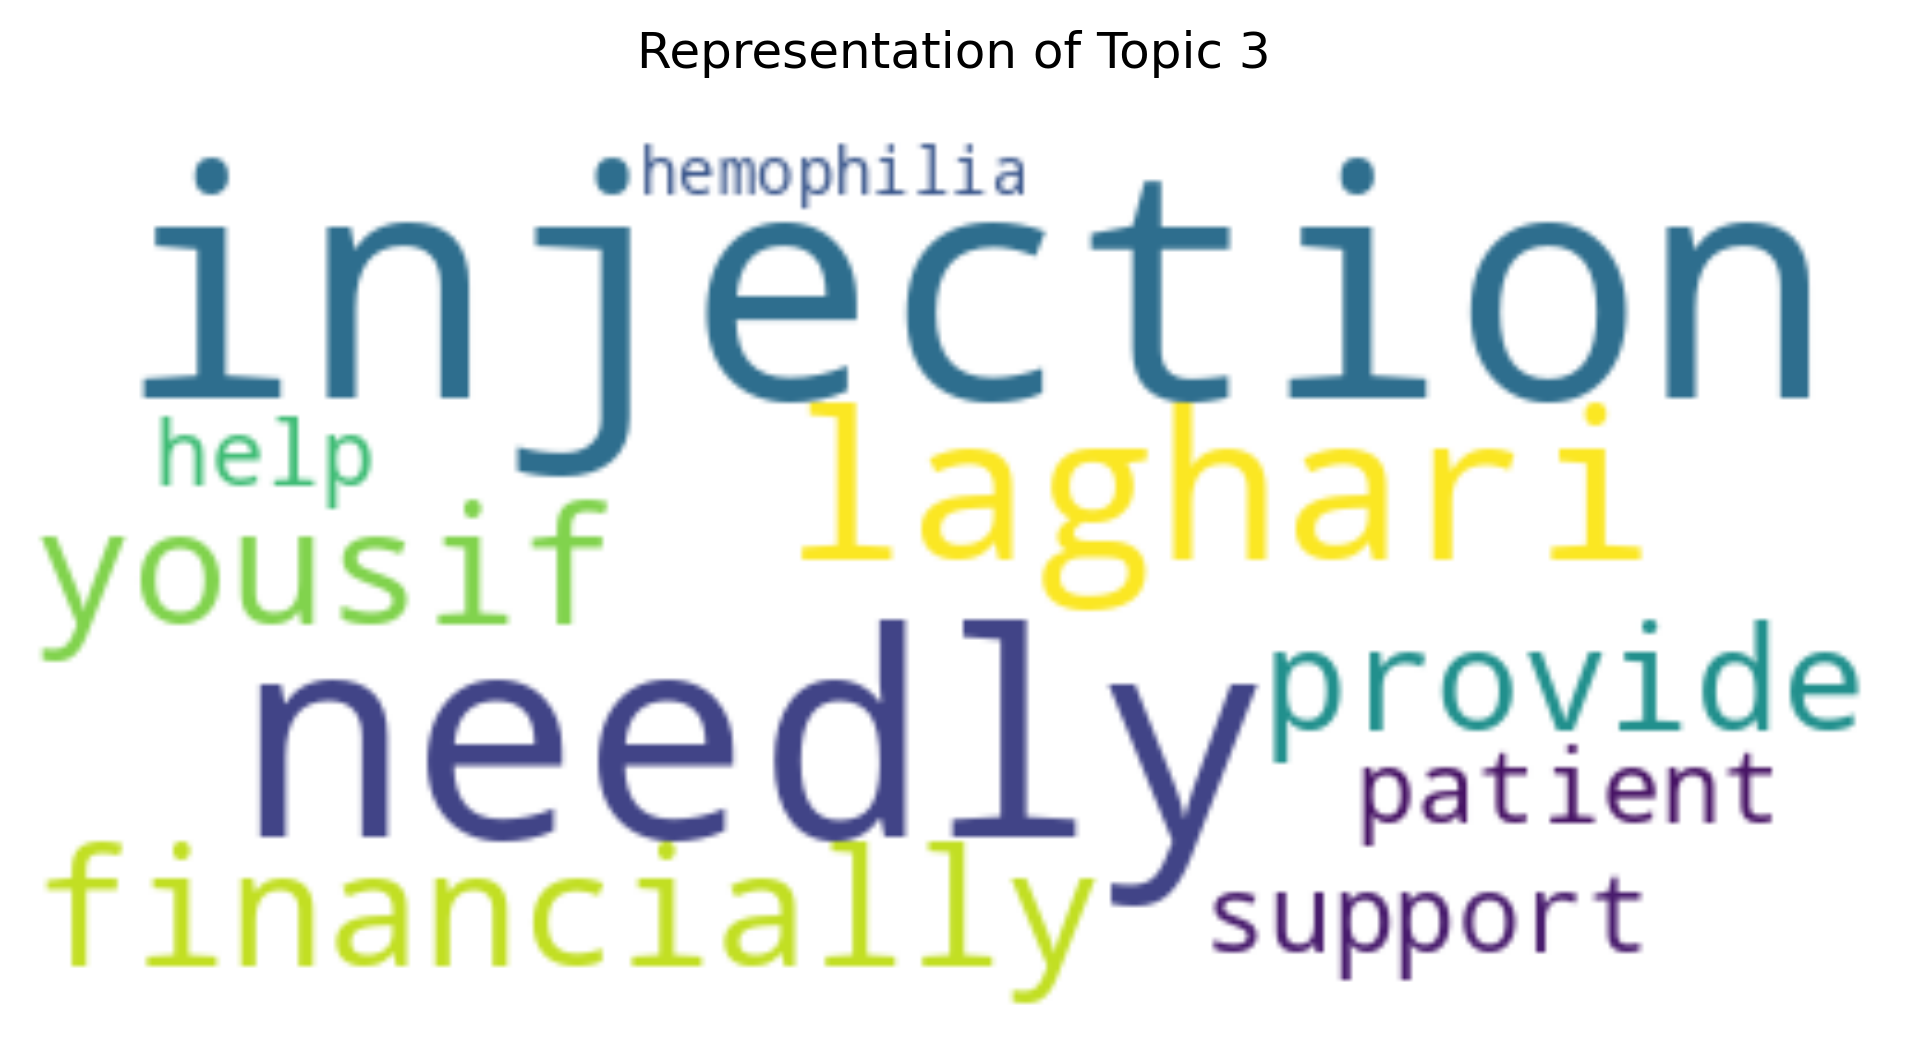

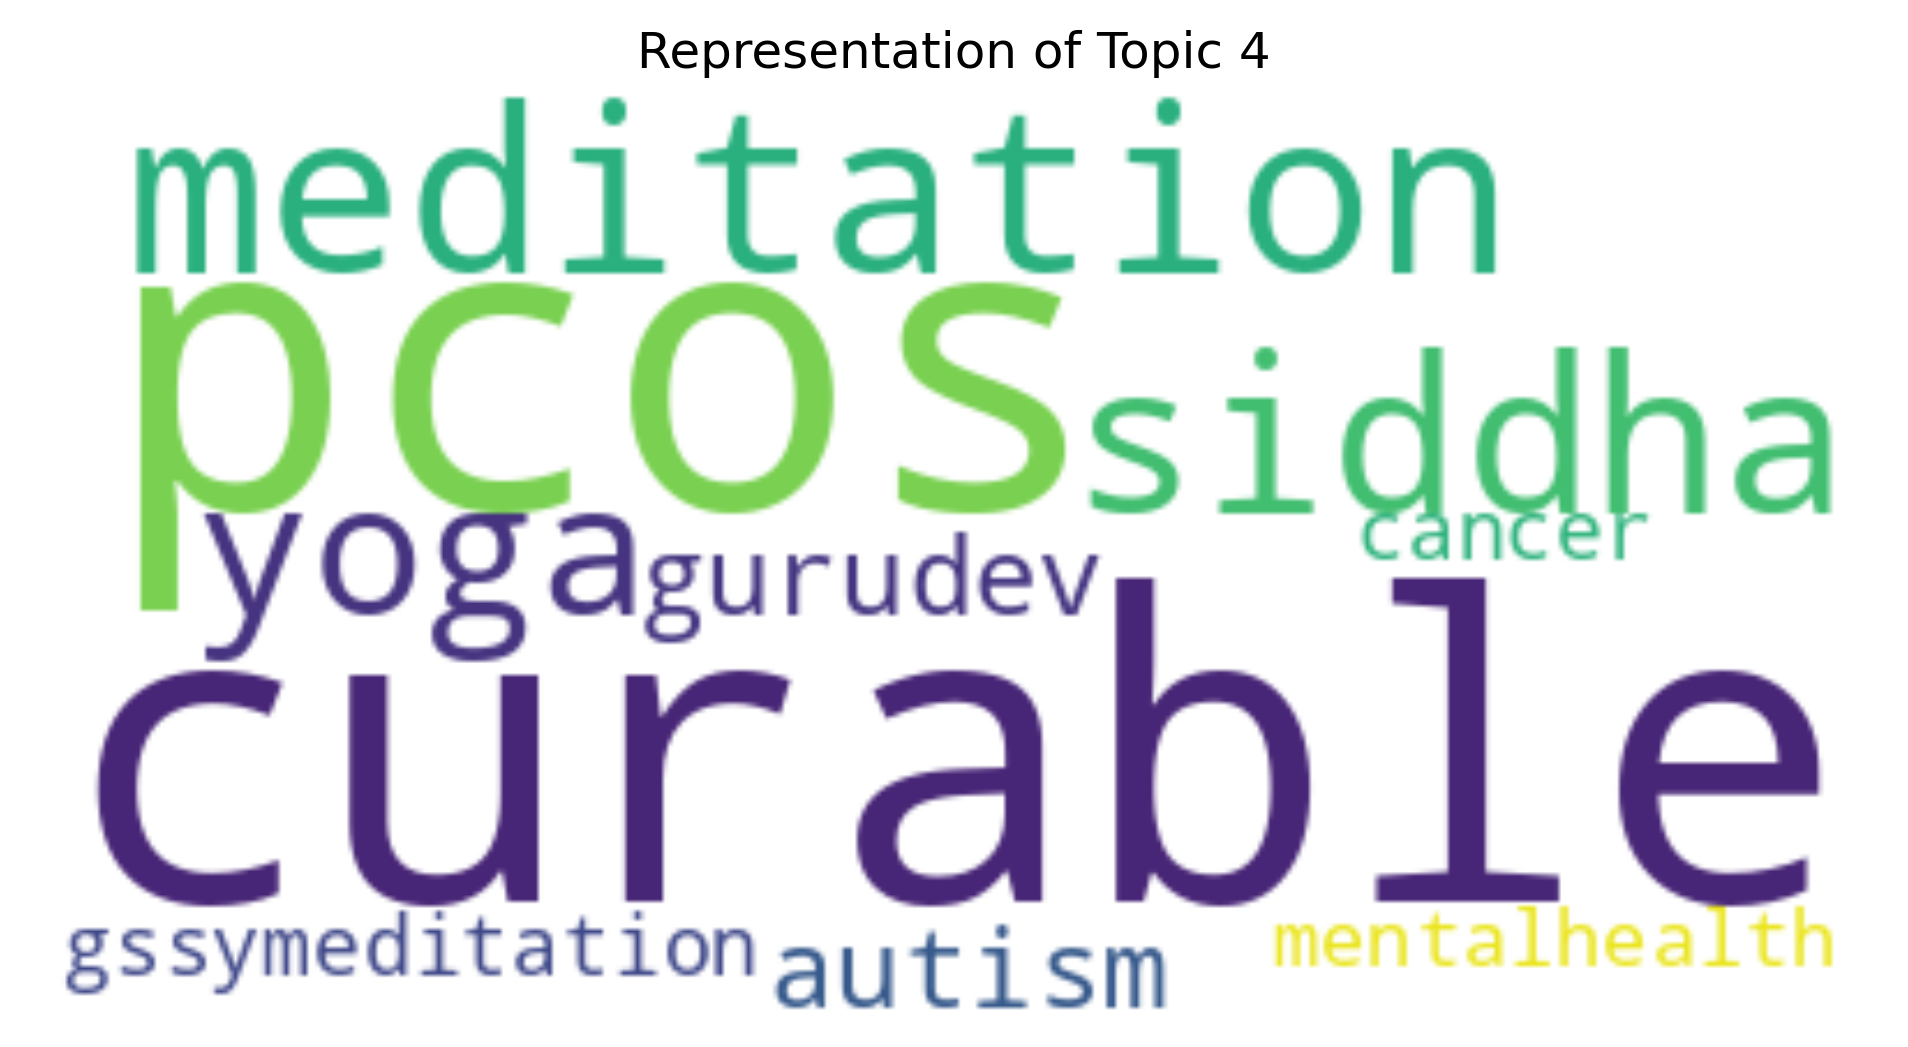

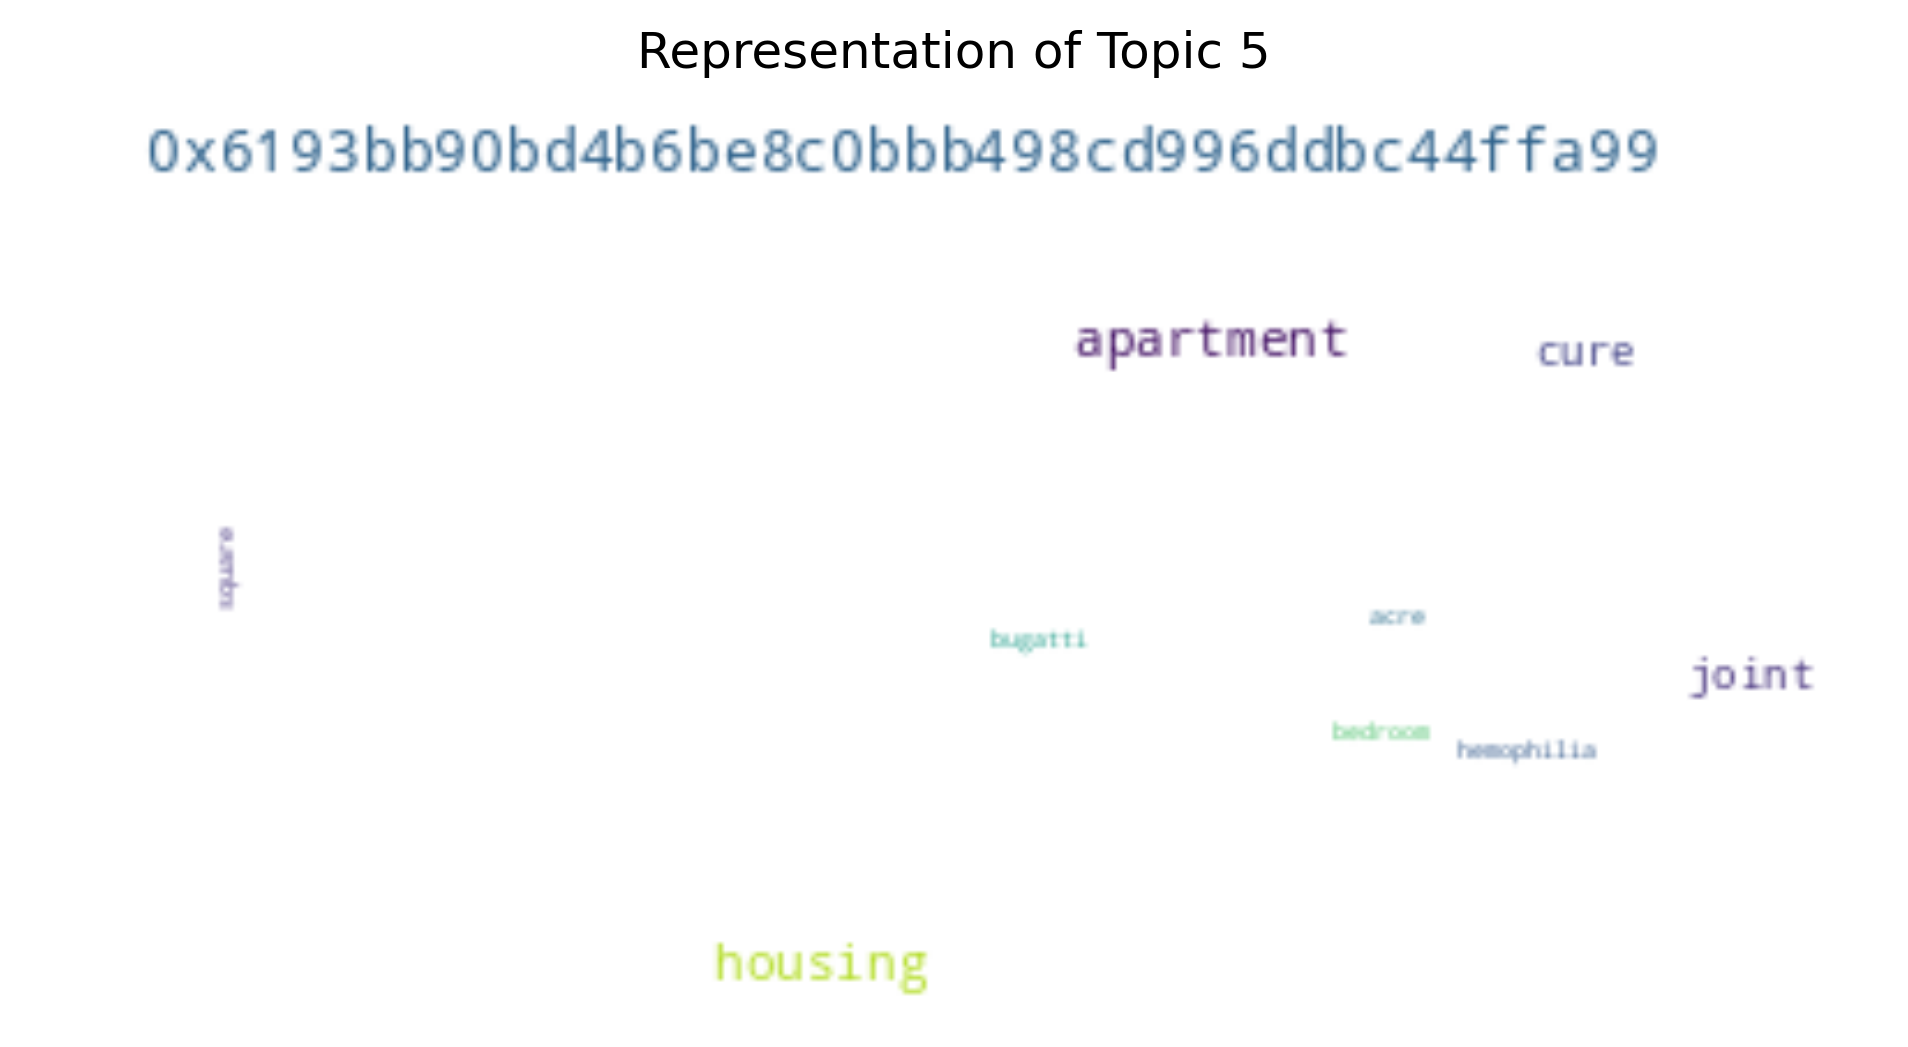

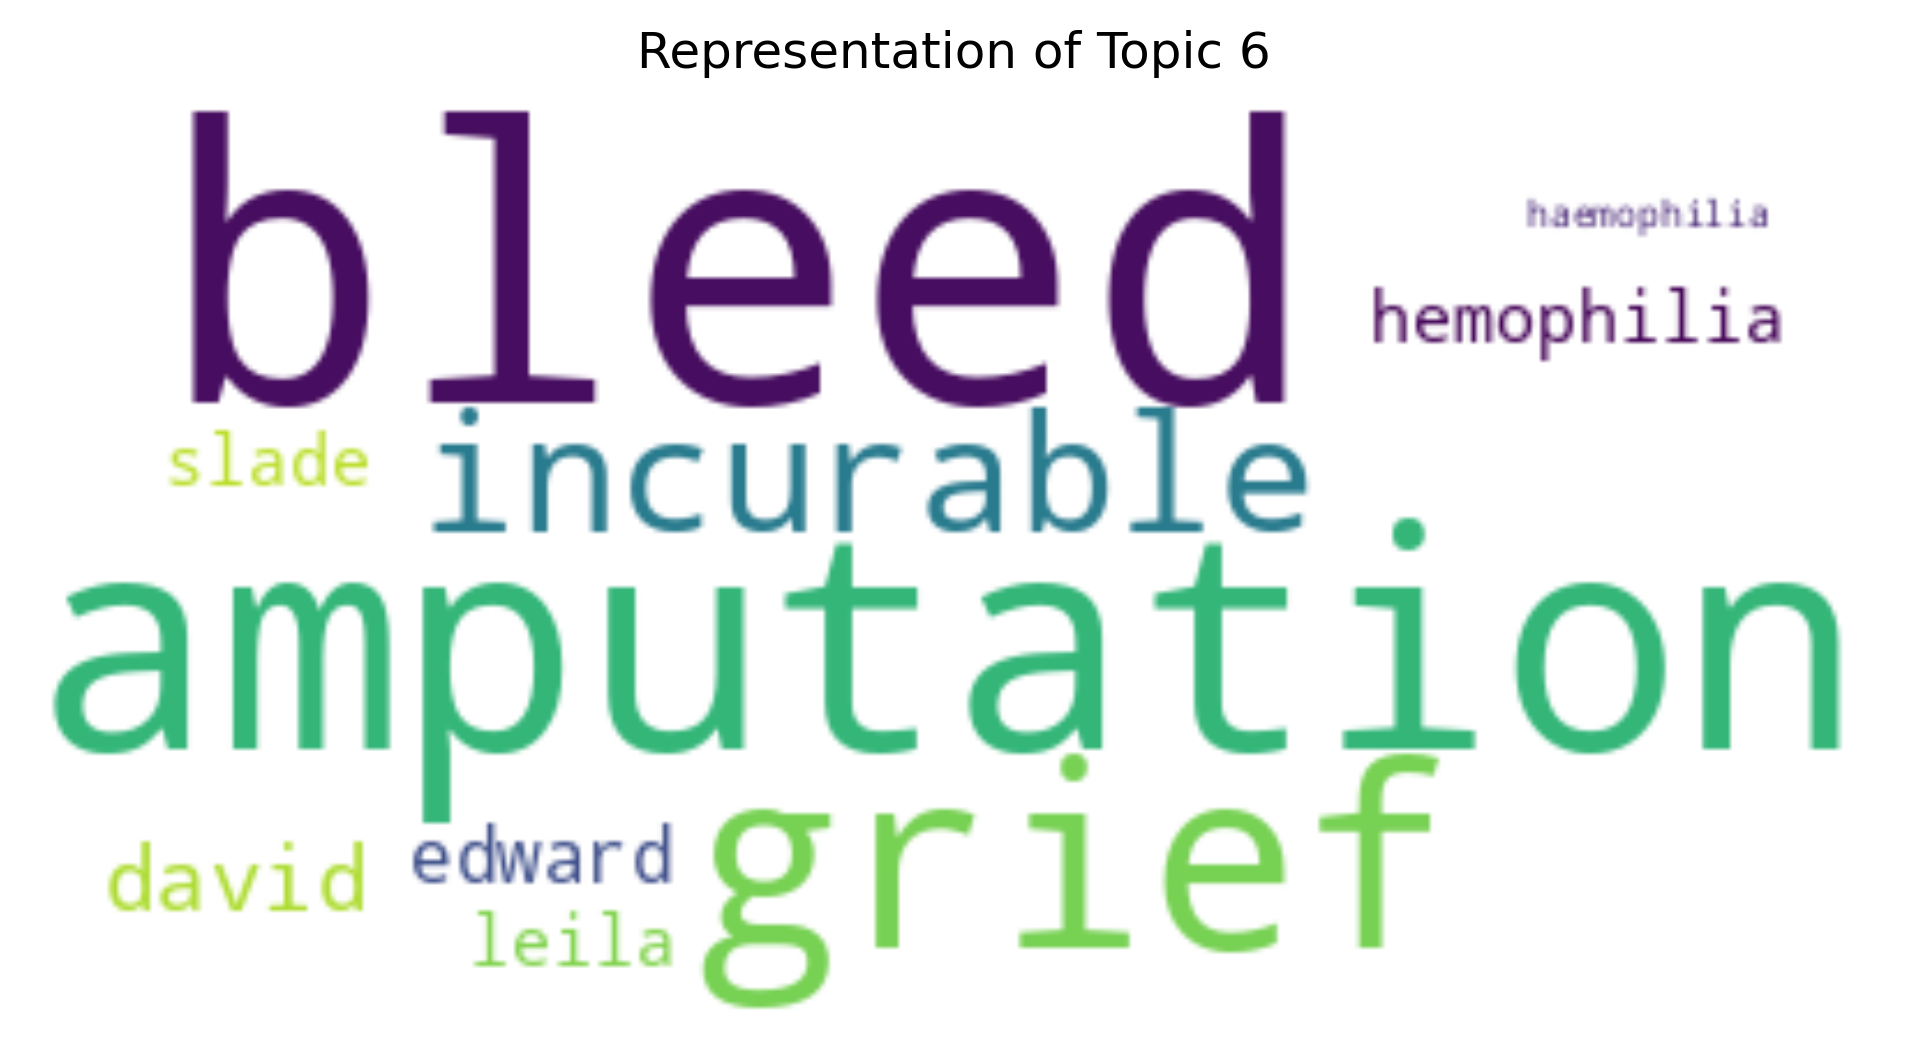

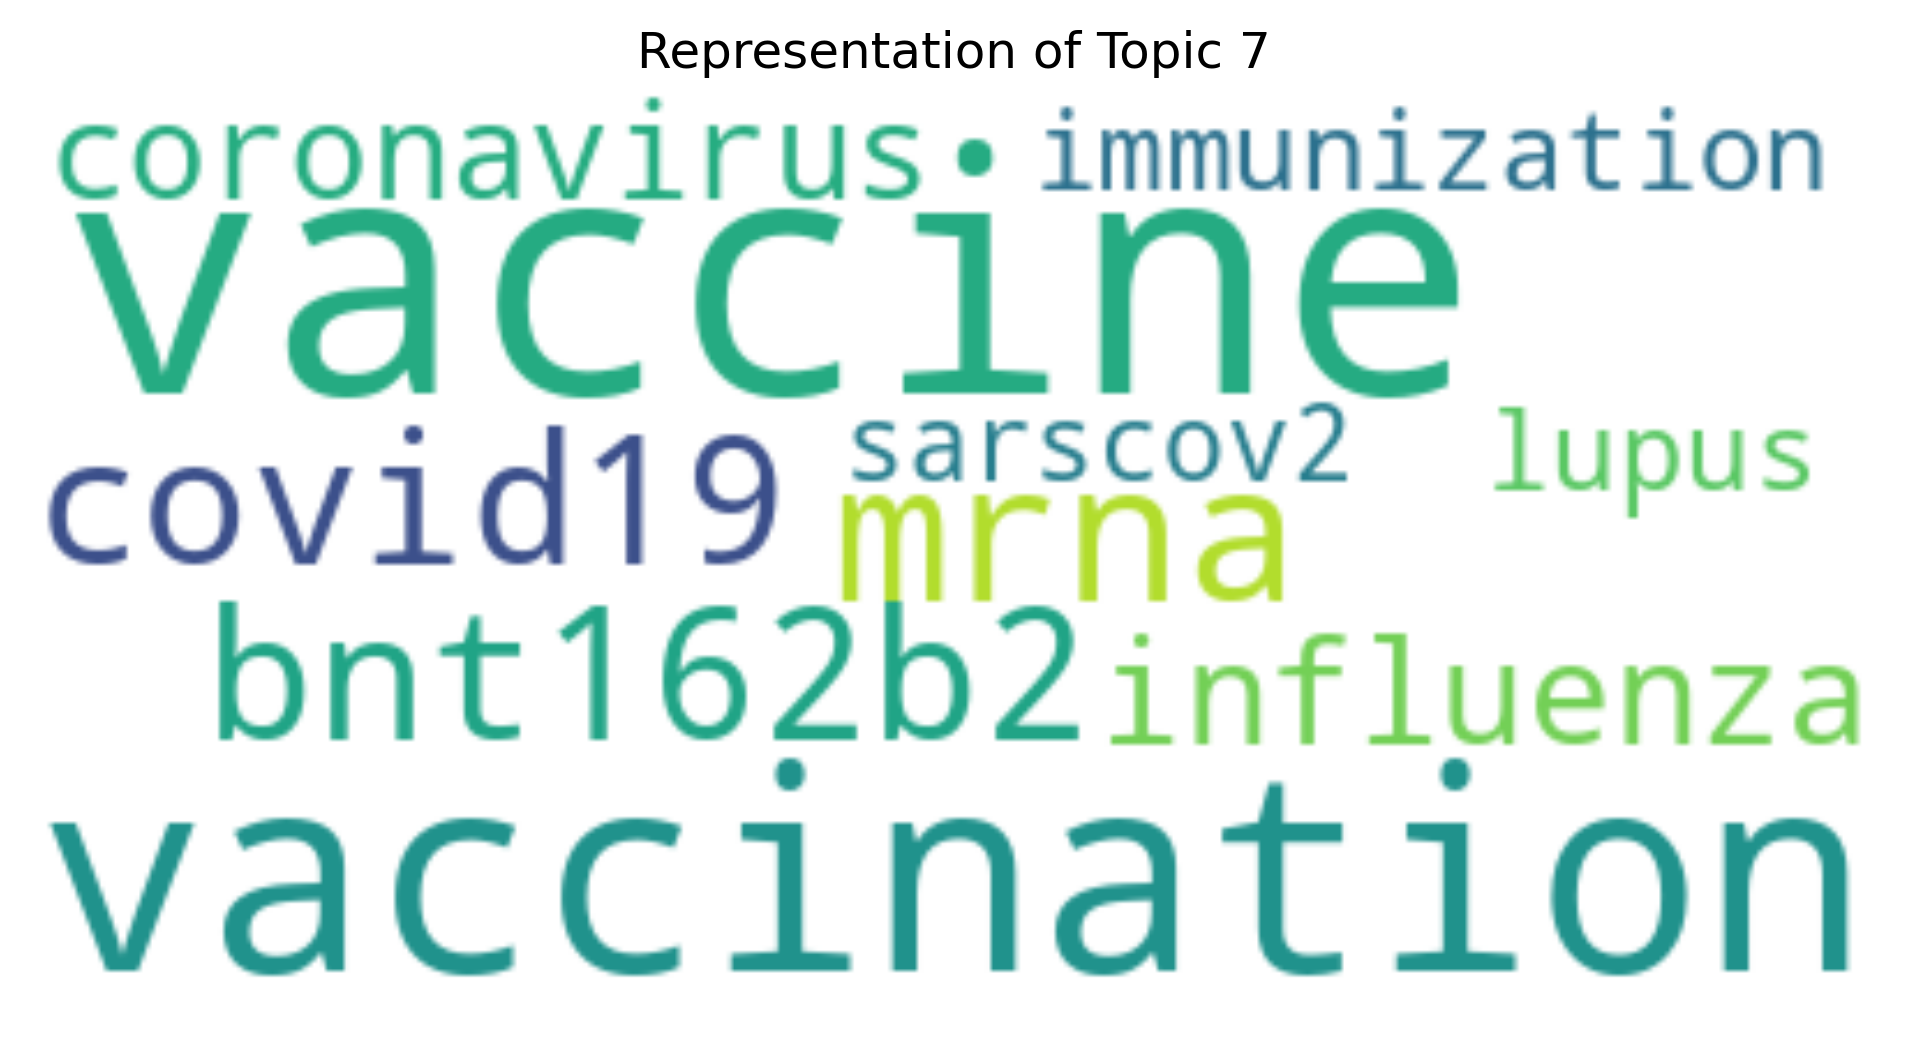

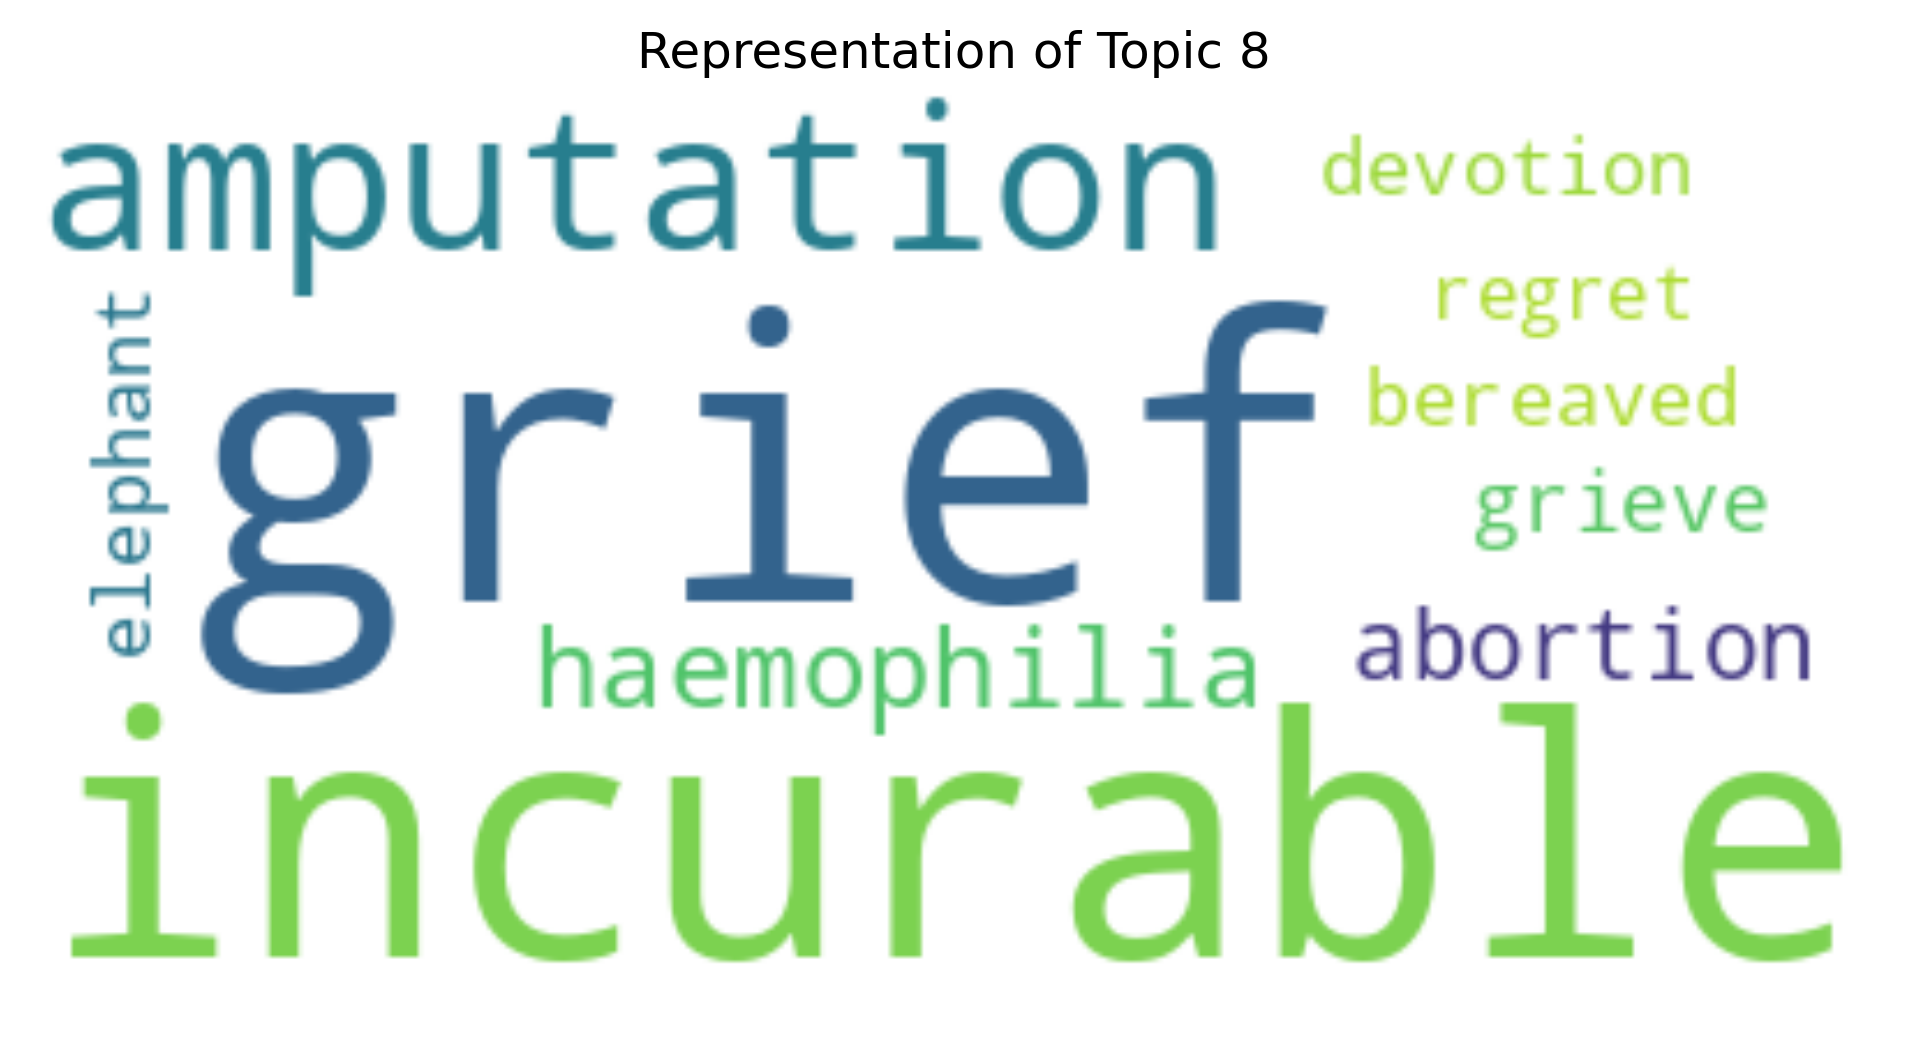

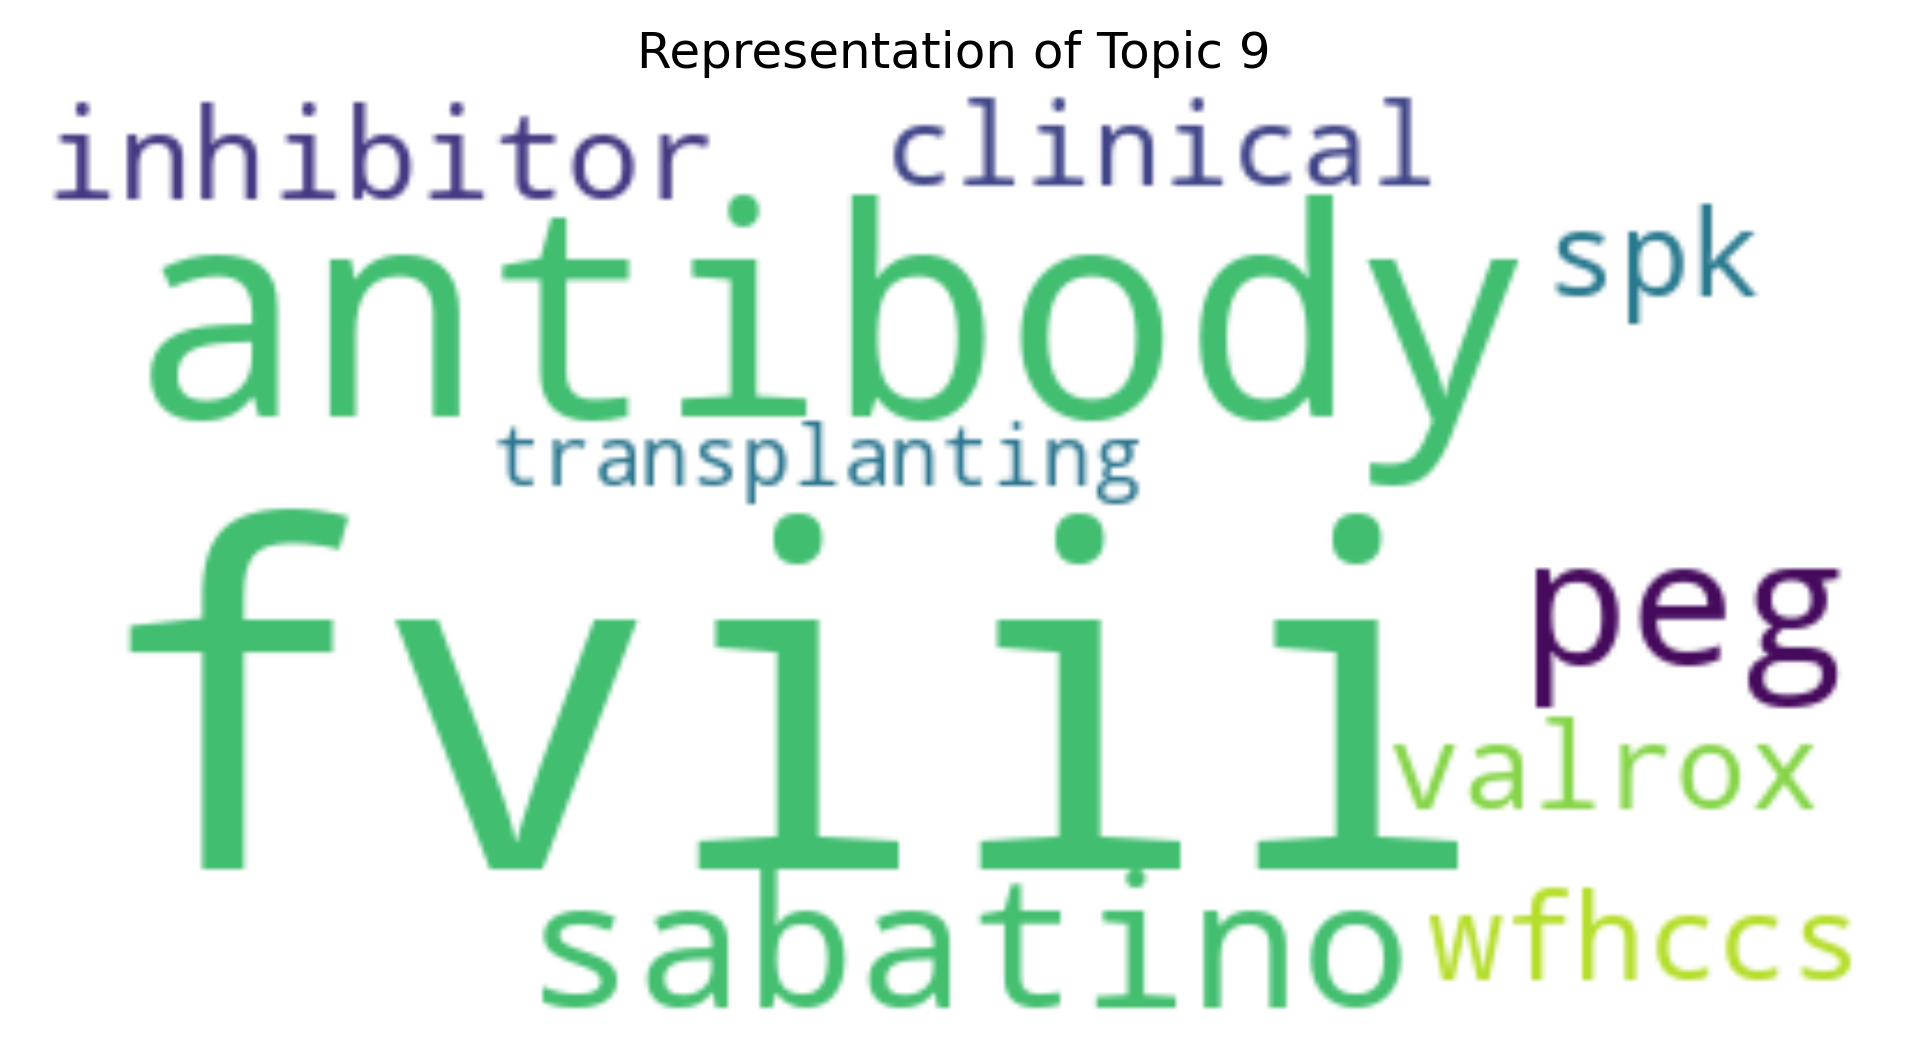

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud



def create_wordcloud(filtered_topic_info, topic_model, topic):
    topic_id = filtered_topic_info.iloc[topic - 1]['Topic']
    text = {word: value for word, value in topic_model.get_topic(topic_id)}

    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)

    plt.figure(figsize=(8, 4), dpi=300)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("Off")
    plt.title("Representation of Topic " + str(topic_id))
    plt.show()

# Visualize word clouds for the top 10 topics
for i in range(1, 11):
    create_wordcloud(filtered_topic_info, topic_model, topic=i)

In [43]:
# Visualize top 10 topics using the filtered_topic_info
topic_model.visualize_barchart(filtered_topic_info['Topic'], top_n_topics=10, n_words=10)

In [46]:
topic_model.visualize_topics(filtered_topic_info['Topic'])